In [3]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt
from espectro import espectro1D


<TransferFunction>: sys[749]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1000 s + 5e+04
--------------------------------
s^3 + 120 s^2 + 4400 s + 4.8e+04

<TransferFunction>: sys[749]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.01114 z^2 + 0.001238 z - 0.007721
-----------------------------------
z^3 - 2.464 z^2 + 2.018 z - 0.5488

dt = 0.005



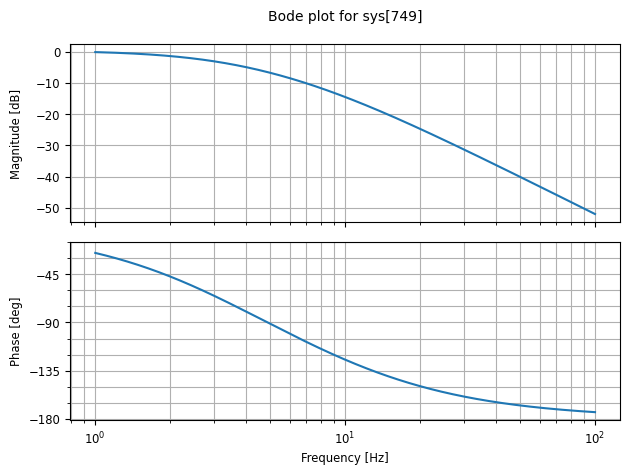

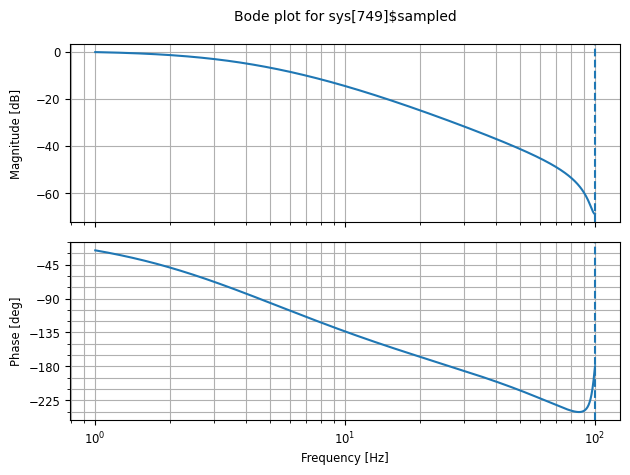

In [78]:
s = ctl.tf('s')
Hs = 1000*(s+50)/(s**3+ 120*s**2+ 4400*s+ 48000)
print(Hs)

Ts = 1/200
fs = 1/Ts
Hz1 = ctl.c2d(Hs, Ts)
print(Hz1)

plt.figure(1)
plt.clf()
ctl.bode(Hs, dB = True, Hz = True)
plt.figure(2)
ctl.bode(Hz1, dB = True, Hz = True)

<TransferFunction>: sys[670]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.005294 z^3 + 0.00647 z^2 - 0.002941 z - 0.004117
--------------------------------------------------
        z^3 - 2.462 z^2 + 2.014 z - 0.5471

dt = 0.005



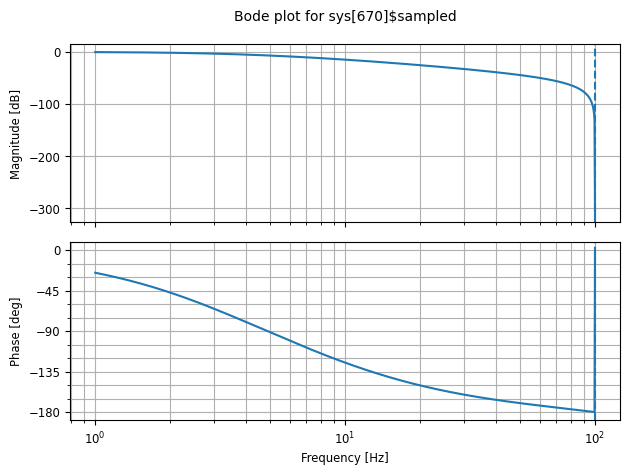

In [68]:
#para o mesmo Hs do item anterior
Hz2 = ctl.c2d(Hs, Ts, method = 'tustin')
print(Hz2)

plt.figure(3)
plt.clf()
ctl.bode(Hz2, dB = True, Hz = True)

[-60.+0.j -40.+0.j -20.+0.j]
[-50.+0.j]
[0.74081822+0.j 0.81873075+0.j 0.90483742+0.j]
[0.77880078+0.j]
<TransferFunction>: sys[766]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     z^2 + 0.2212 z - 0.7788
----------------------------------
z^3 - 2.464 z^2 + 2.018 z - 0.5488

dt = 0.005

1.040105595823693
98.8022826442947
0.010527141357333342
<TransferFunction>: sys[768]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.01053 z^2 + 0.002329 z - 0.008199
-----------------------------------
z^3 - 2.464 z^2 + 2.018 z - 0.5488

dt = 0.005



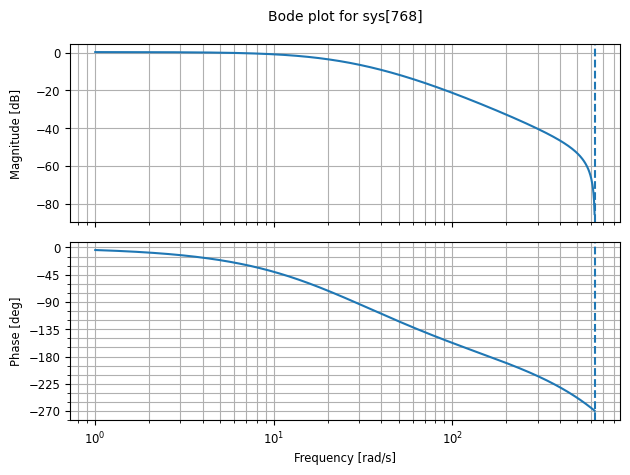

In [84]:
#utilizando a mesma função Hs

wi = 1

polos = Hs.poles()
zeros = Hs.zeros()
print(polos)
print(zeros)


#retirando os polos e zeros de Hs

polos_z = np.exp(polos*Ts)
zeros_z = np.exp(zeros*Ts)
print(polos_z)
print(zeros_z)

#correspondendo polos e zeros de Hs para polos e zeros de Hz

zeros_z = np.append(zeros_z, -1)

#adicionando um zero em -1

HzSemGanho = ctl.tf(np.poly(zeros_z), np.poly(polos_z), Ts)
print(HzSemGanho)
#func. Hz sem ganho

Ks = abs(ctl.evalfr(Hs, 1j* wi))
print(Ks)
kz_prov = abs(ctl.evalfr(HzSemGanho, np.exp(1j * wi * Ts)))
print(kz_prov)
#ganho Ks e Kz

Kz = Ks/kz_prov
print(Kz)
#Kz real da diferença entre os ganhos e implementação do ganho em Hz

Hz3 = Kz*HzSemGanho
print(Hz3)

plt.figure(3)
plt.clf()
ctl.bode(Hz3, dB = True)

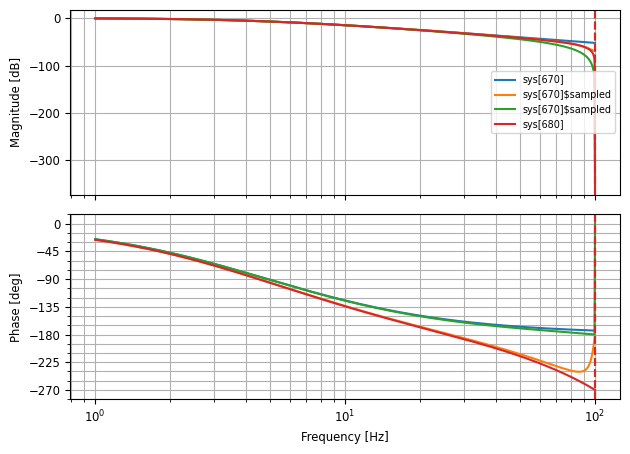

In [72]:
plt.figure(4)
plt.clf()
ctl.bode(Hs, dB = True, Hz = True )
ctl.bode(Hz1, dB = True, Hz = True)
ctl.bode(Hz2, dB = True, Hz = True)
ctl.bode(Hz3, dB = True, Hz = True)